<a href="https://colab.research.google.com/github/Nathtaba/Case_Recrutamento_Preditivo/blob/main/Recrutamento_preditivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install plotly_express
!pip install --upgrade scikit-learn

In [2]:
import pandas as pd
import seaborn as sb
import plotly_express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [3]:
df_recrut = pd.read_excel('Recrutamento.xlsx')

In [4]:
df_recrut.shape

(215, 15)

In [5]:
df_recrut.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


 Temos algumas variáveis como: gênero, desempenho educacional, score de desempenho educacional, status de contratação, salário. Variável Target: coluna status.

In [6]:
df_recrut['status'].unique() #Saber quais os dados unicos da coluna status

array(['Yes', 'No'], dtype=object)

In [7]:
df_recrut.describe() #Usado somente para colunas numéricas

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
df_recrut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Inferência sobre os dados:
Métricas de pontuação sobre ensino: ssc_p hsc_p degree_p estet_p mba_p
sl_no é um ID, então não será analisado.

In [9]:
#Verificar se existe valores nulos
df_recrut.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<Axes: xlabel='status', ylabel='salary'>

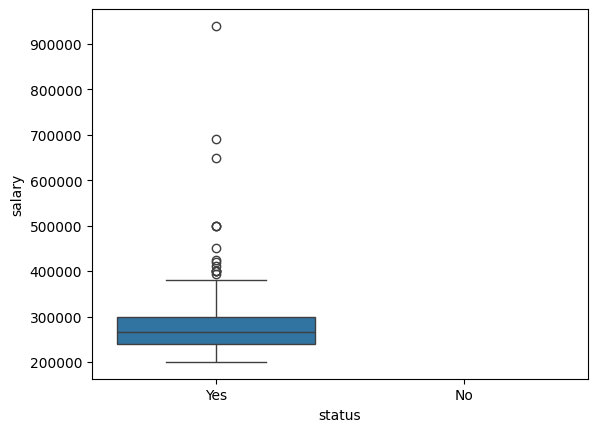

In [10]:
#Verificar os valores nulos da coluna Salary
sb.boxplot(x='status', y='salary', data=df_recrut)

In [11]:
#Preencher os valores nulos com value=0 utilizando o 'FILLNA'
df_recrut['salary'].fillna(value=0, inplace=True)

Procurar se existe discrepância em cada coluna numérica

In [12]:
df_recrut.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<Axes: xlabel='ssc_p'>

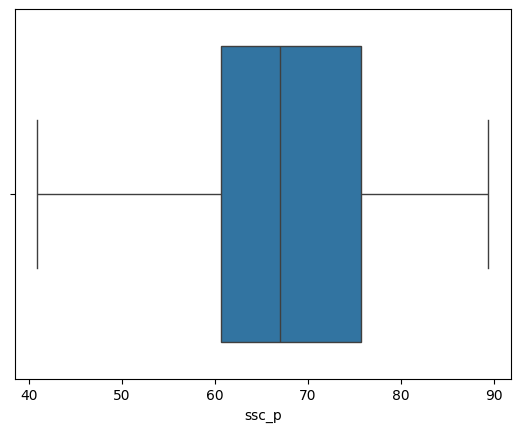

In [13]:
sb.boxplot(x=df_recrut["ssc_p"])

<Axes: xlabel='ssc_p', ylabel='Count'>

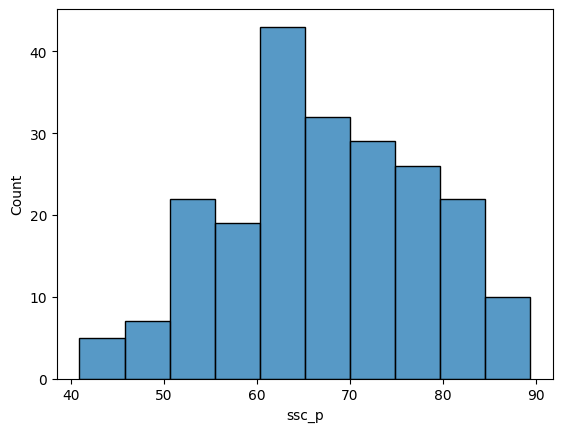

In [14]:
sb.histplot(data=df_recrut, x="ssc_p")

<Axes: xlabel='hsc_p'>

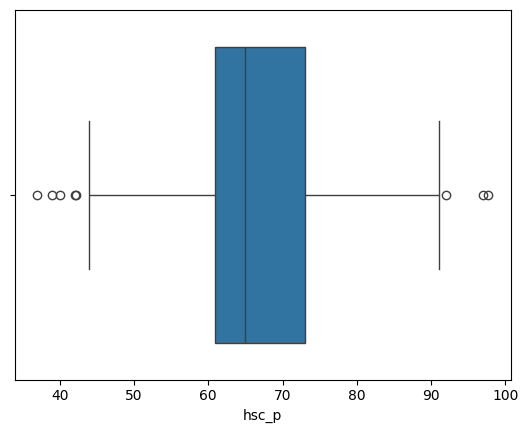

In [15]:
sb.boxplot(x=df_recrut["hsc_p"])

<Axes: xlabel='hsc_p', ylabel='Count'>

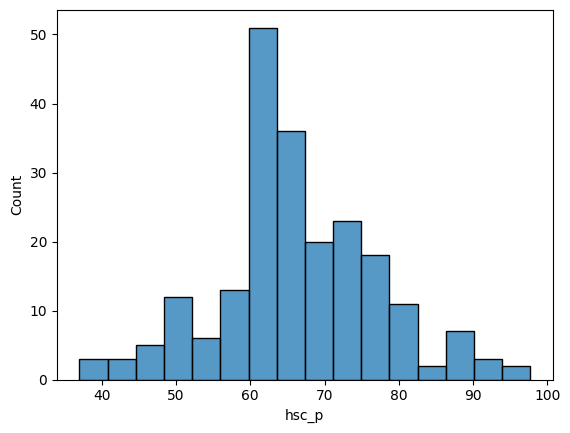

In [16]:
sb.histplot(data=df_recrut, x="hsc_p")

<Axes: xlabel='degree_p'>

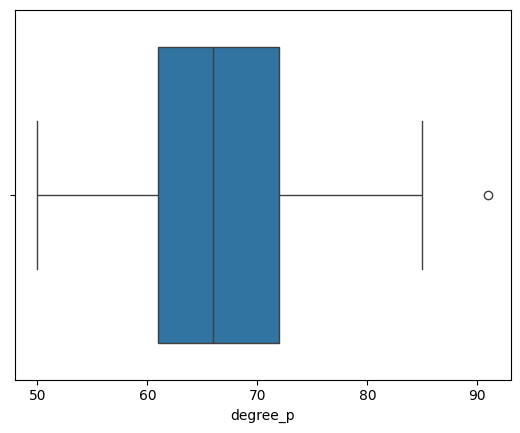

In [17]:
sb.boxplot(x=df_recrut["degree_p"])

<Axes: xlabel='degree_p', ylabel='Count'>

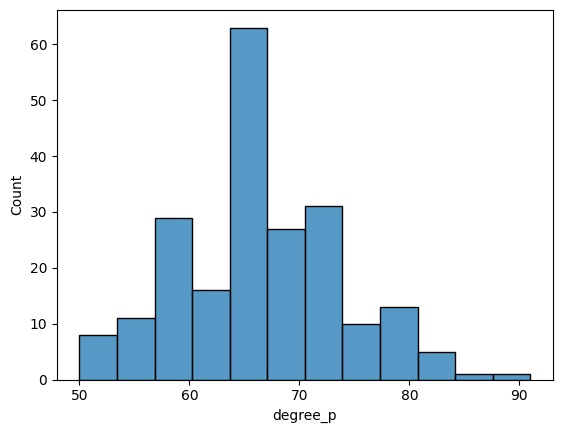

In [18]:
sb.histplot(data=df_recrut, x="degree_p")

<Axes: xlabel='etest_p'>

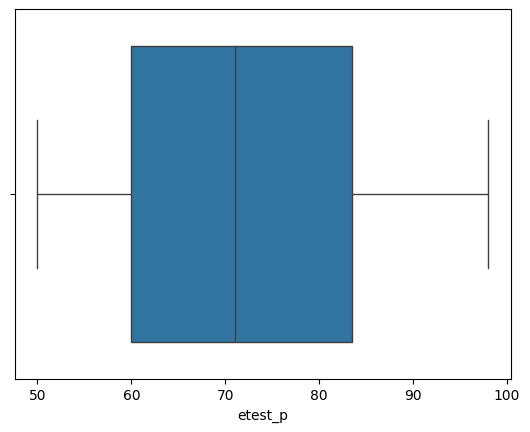

In [19]:
sb.boxplot(x=df_recrut["etest_p"])

<Axes: xlabel='etest_p', ylabel='Count'>

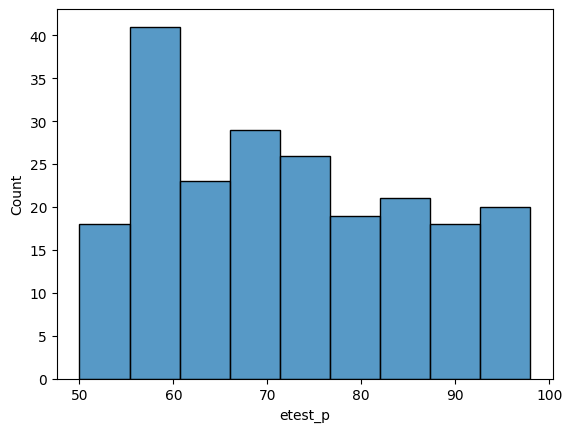

In [20]:
sb.histplot(data=df_recrut, x="etest_p")

<Axes: xlabel='mba_p'>

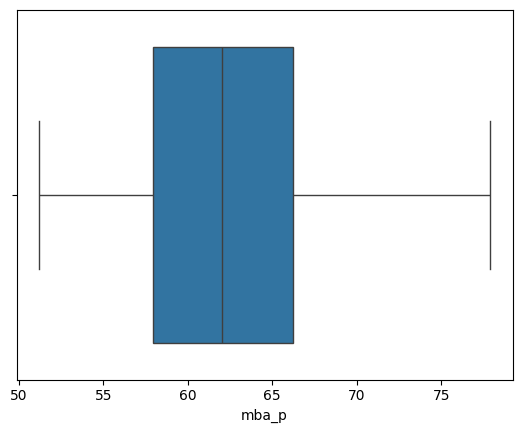

In [21]:
sb.boxplot(x=df_recrut["mba_p"])

<Axes: xlabel='mba_p', ylabel='Count'>

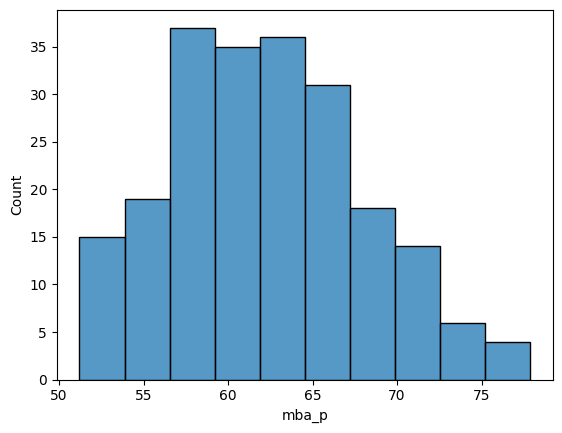

In [22]:
sb.histplot(data=df_recrut, x="mba_p")

<Axes: xlabel='salary'>

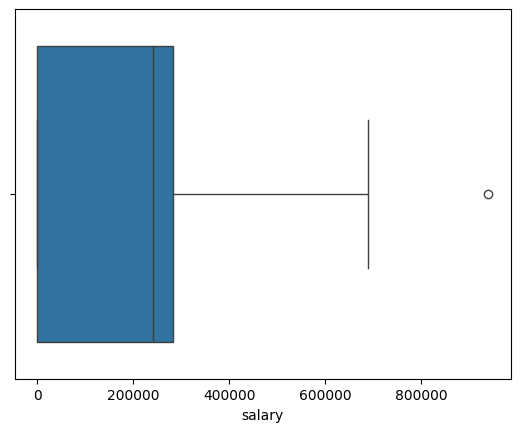

In [23]:
sb.boxplot(x=df_recrut["salary"])

<Axes: xlabel='salary', ylabel='Count'>

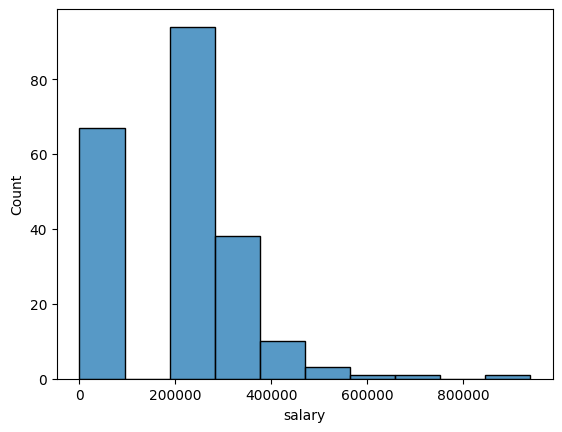

In [24]:
sb.histplot(data=df_recrut, x="salary")

[Text(36.5, 0.5, '')]

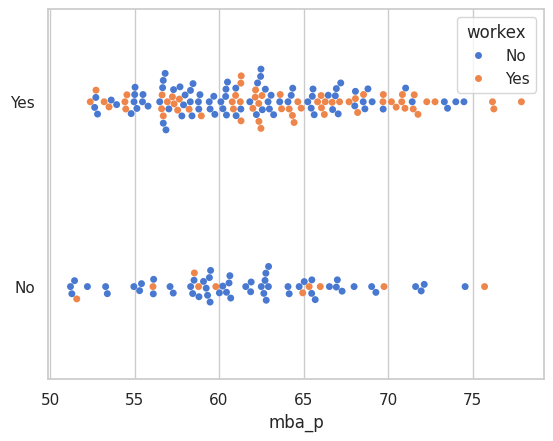

In [25]:
#Verificar se os scores acadêmicos influenciam na contratação
sb.set_theme(style="whitegrid", palette="muted")
ax = sb.swarmplot(data=df_recrut, x="mba_p", y="status", hue="workex")
ax.set(ylabel="")

In [26]:
#Verificar se o gênero influência na contratação e no salario
px.violin(df_recrut,y="salary",x="specialisation",color="gender",box=True,points="all")

Inferência sobre os dados:
Os maiores salários foram dados aos homens. O salário médio oferecido também foi maior para homens.

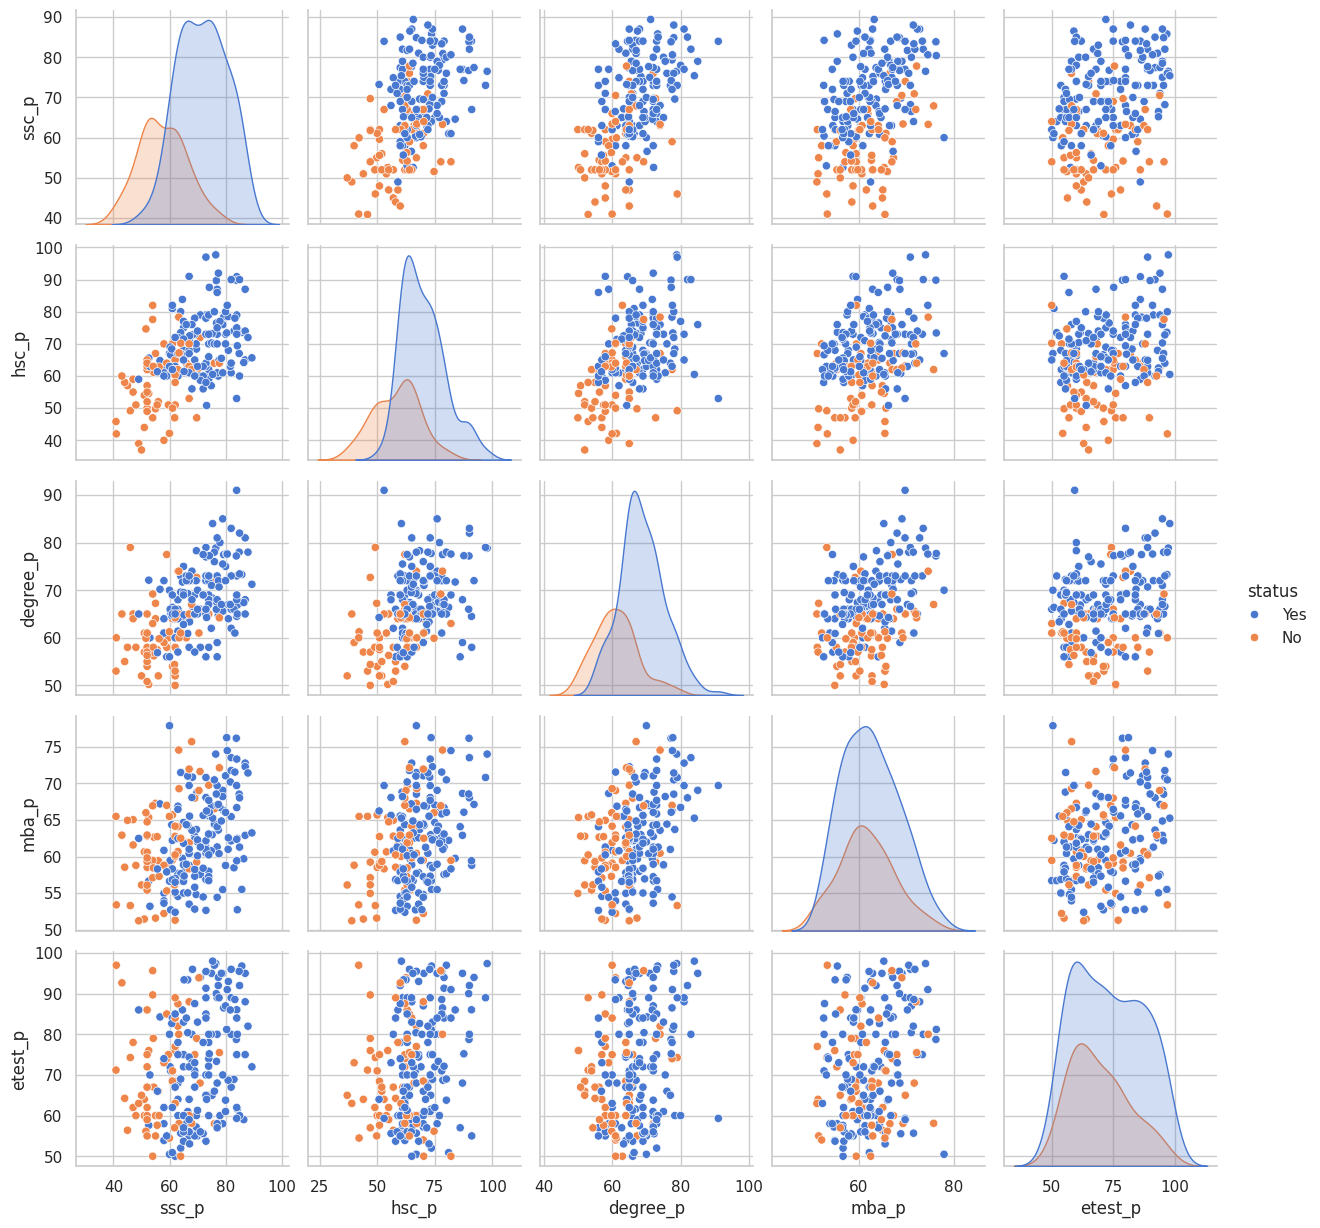

In [27]:
#Analisa a correlação entre as pontuações de desempenho acadêmico com a contratação
sb.pairplot(df_recrut,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

Inferência sobre os dados:
Candidatos com pontuação alta no ensino médio e na graduação foram contratados. Quem obteve notas altas em suas escolas foi contratado.

<Axes: >

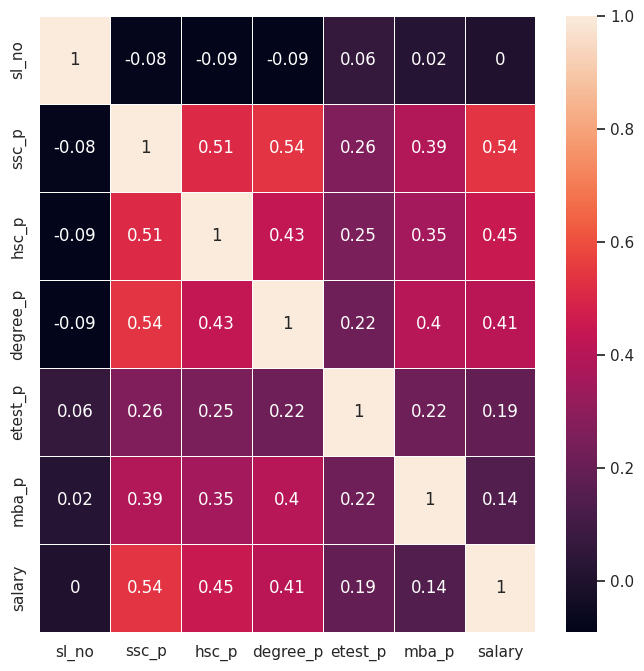

In [28]:
#Matrix de correlação com as colunas numericas
df_num = df_recrut[['sl_no','ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']]
correlation_matrix = df_num.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)


Aqui somente conseguimos analisar a correlação entre as variáveis numéricas.

Aplicando técnicas de transformação nos dados, vamos utilizar label enconder para tratar variáveis categoricas que possuem apenas dois tipos de categorias, como genero, especialização e status.
Para as demais categorias, vamos aplicar a tecnica de one hot enconing.

In [29]:
df_recrut.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [30]:
#Transformando as colunas categoricas em categoricas utilizando LabelEnconder
colunas=['gender','workex','specialisation','status']
label_encoder = LabelEncoder()
for col in colunas:
    df_recrut[col] = label_encoder.fit_transform(df_recrut[col])

In [31]:
#Transformando as colunas categoricas em categoricas utilizando OneHotEnconder
dummy_hsc_s=pd.get_dummies(df_recrut['hsc_s'], prefix='column', dtype=int)
dummy_degree_t=pd.get_dummies(df_recrut['degree_t'], prefix='column',dtype=int)

dados_coeded = pd.concat([df_recrut,dummy_hsc_s,dummy_degree_t],axis=1)
dados_coeded.drop(['hsc_s','degree_t','salary','ssc_b','hsc_b'],axis=1, inplace=True) #Deleta as colunas que não serão analisadas

In [32]:
dados_coeded.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,column_Arts,column_Commerce,column_Science,column_Comm&Mgmt,column_Others,column_Sci&Tech
0,1,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,2,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,3,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,4,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,5,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


<Axes: >

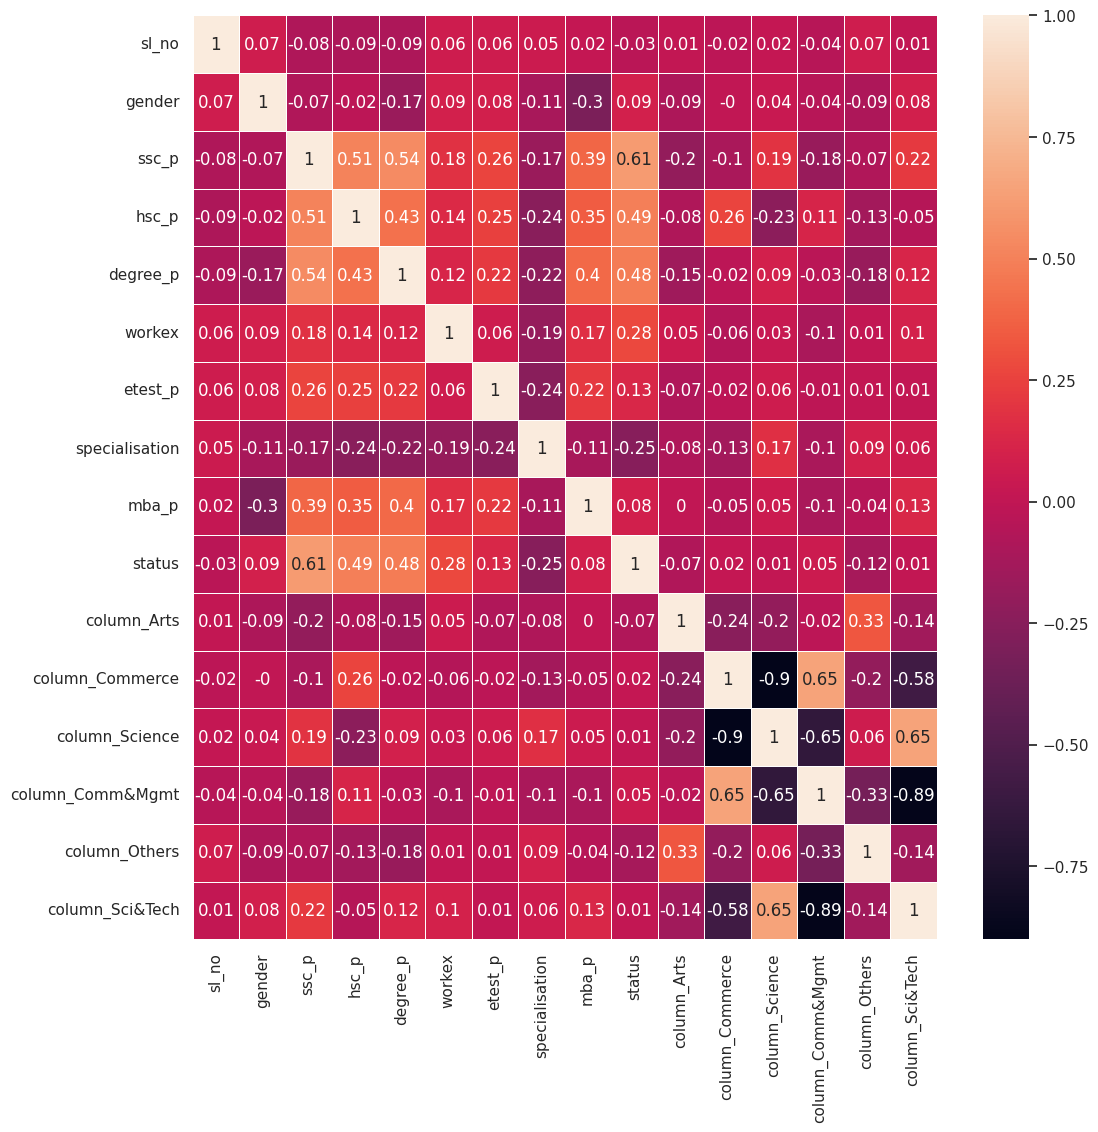

In [33]:
#Matrix de correlação após tratar os dados categoricos
correlation_matrix = dados_coeded.corr().round(2)

fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

A maior correlação de status de contratação está com o score de ssc_p, ou seja, pessoas com alto score de ssc_p são mais contratadas.

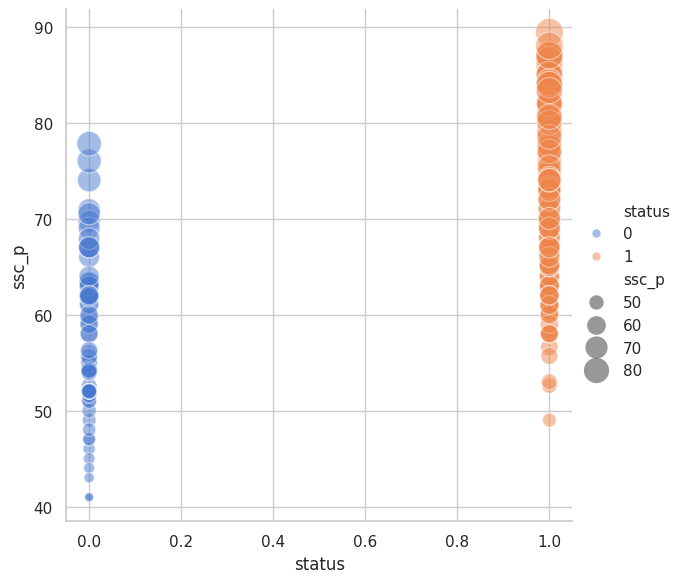

In [34]:
sb.relplot(x="status", y="ssc_p", hue="status", size="ssc_p",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dados_coeded)

In [35]:
#Separar as bases de treino e teste
X = dados_coeded[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']] #variaveis independentes
y = dados_coeded['status'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

In [36]:
X_train.shape

(172, 5)

In [37]:
X_test.shape

(43, 5)

In [38]:
#Utilizar o StandardScaler para escalonar os dados
scaler = StandardScaler()
scaler.fit(X_train)

x_train_escalonado = scaler.transform(X_train)
x_test_escalonado = scaler.transform(X_test)

In [45]:
#Analisando o modelo KNN
error = []

# Calculando o erro para K com valores entre 1 e 10
for i in range(1, 20): #range de tentativas para k
    knn = KNeighborsClassifier(n_neighbors=i)# aqui definimos  o k
    knn.fit(x_train_escalonado, y_train) #treinando o algoritmo para encontrar o erro
    pred_i = knn.predict(x_test_escalonado) #armazenando as previsões
    error.append(np.mean(pred_i != y_test)) #armazenando o valor do erro médio na lista de erros

In [ ]:
error

Text(0, 0.5, 'Mean Error')

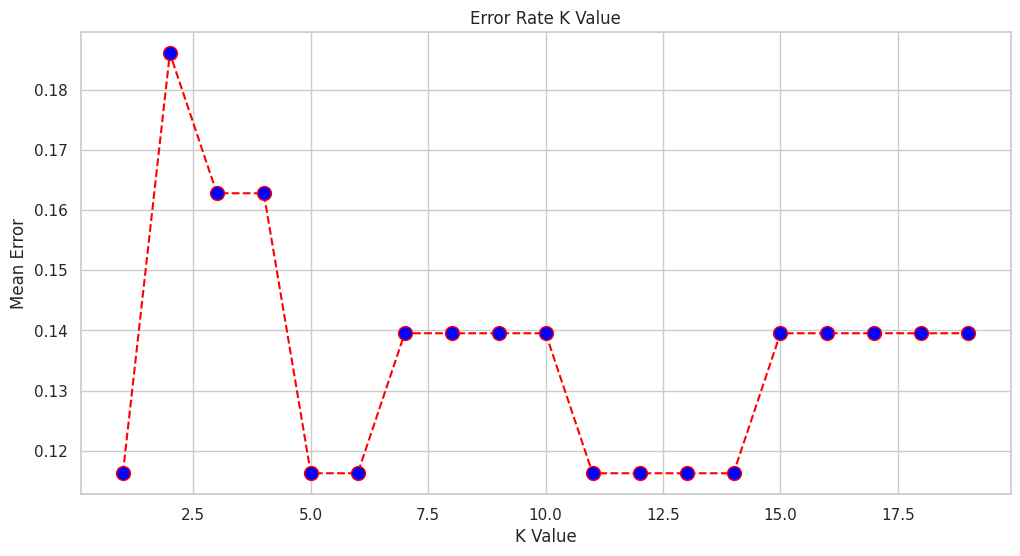

In [47]:
#Visualização quais K deram menos erro
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [48]:
#Utilizando o modelo KNN
modelo_classificador = KNeighborsClassifier(n_neighbors=5)
modelo_classificador.fit(x_train_escalonado, y_train)
y_predit = modelo_classificador.predict(x_test_escalonado)

In [49]:
y_predit

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [50]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(accuracy_score(y_test, y_predit)) #relatório de validação das métrica de desempenho.

0.8837209302325582
